In [5]:
from ggplot import *
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("../data-2016-03-30.csv")

df["GFLOPs"] = df.loc[:,["N", "kernel", "T"]].apply(lambda x: x[0]**2 * 7 * x[-1] / x[-2] / 1e9, axis=1)
df["bandwidth"] = df.loc[:,["N", "kernel", "T"]].apply(lambda x: x[0]**2 * 5 * 4 * x[-1] / x[-2] / 1e9, axis=1)
df["speedup"] = df.loc[:,["N", "kernel"]].apply(lambda x: df[df.gpus == 1][df.N == x[0]].loc[:,["kernel"]].iloc[0,0] / x[1], axis=1)
df["relDepResTime"] = df.loc[:, ["kernel", "depResTime"]].apply(lambda x: x[1] / x[0], axis=1)
df["totalTime"] = df.loc[:, ["htod", "kernel", "dtoh"]].apply(lambda x: x[0] + x[1] + x[2], axis=1)
df["totalSpeedup"] = df.loc[:,["N", "totalTime"]].apply(lambda x: df[df.gpus == 1][df.N == x[0]].loc[:,["totalTime"]].iloc[0,0] / x[1], axis=1)
df["depResTime"] = df.loc[:,["gpus", "depResTime"]].apply(lambda x : 0 if x[0] == 1 else x[1], axis=1)
df["kernel-depResTime"] = df.loc[:, ["gpus", "kernel", "depResTime"]].apply(lambda x: x[1] if x[0] == 1 else x[1] - x[2], axis=1)
df


,N,gpus,htod,kernel,dtoh,T,depResTime,depResSize[MB],GFLOPs,bandwidth,speedup,relDepResTime,totalTime,totalSpeedup,kernel-depResTime
0,1024,1,0.002371,0.214463,0.002174,1000,0.000000,NaN,34.225167,97.786192,1.000000,NaN,0.219008,1.000000,0.214463
1,2048,1,0.010068,0.641721,0.008800,1000,0.000000,NaN,45.752170,130.720484,1.000000,NaN,0.660589,1.000000,0.641721
2,4096,1,0.035820,2.070780,0.019126,1000,0.000000,NaN,56.713177,162.037648,1.000000,NaN,2.125726,1.000000,2.070780
3,8192,1,0.122549,8.048830,0.072959,1000,0.000000,NaN,58.364017,166.754333,1.000000,NaN,8.244338,1.000000,8.048830
4,12288,1,0.242043,18.082400,0.261473,1000,0.000000,NaN,58.452673,167.007636,1.000000,NaN,18.585916,1.000000,18.082400
5,16384,1,0.486691,32.268800,0.442450,1000,0.000000,NaN,58.231115,166.374613,1.000000,NaN,33.197941,1.000000,32.268800
6,20480,1,0.597302,50.301500,0.712938,1000,0.000000,NaN,58.368295,166.766558,1.000000,NaN,51.611740,1.000000,50.301500
7,24576,1,1.077290,72.543900,0.996710,1000,0.000000,NaN,58.279999,166.514283,1.000000,NaN,74.617900,1.000000,72.543900
8,28672,1,0.999364,98.579500,1.389670,1000,0.000000,NaN,58.375069,166.785911,1.000000,NaN,100.968534,1.000000,98.579500
9,32768,1,1.701450,128.810000,1.574570,1000,0.000000,NaN,58.351004,166.717153,1.000000,NaN,132.086020,1.000000,128.810000


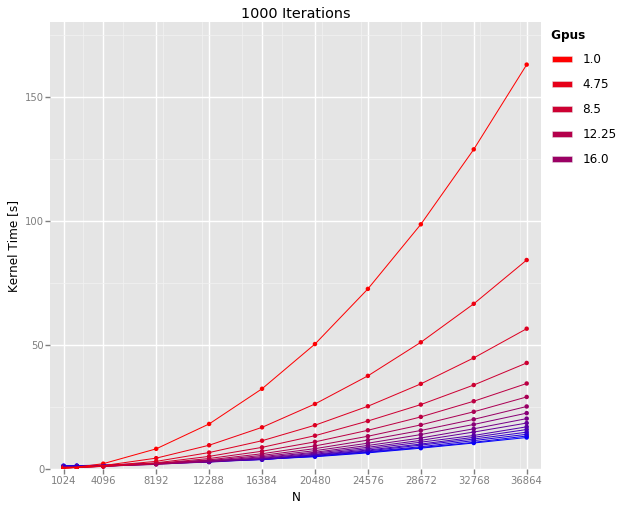

<ggplot: (8767967566205)>

In [7]:
p = ggplot(aes(x="N", y="kernel", color="gpus"), data=df) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("Kernel Time [s]") +\
scale_x_continuous(breaks=[1024,4096,8192,12288,16384,20480,24576,28672,32768,36864])+\
xlim(0, 38000) + ylim(0, 180) + ggtitle("1000 Iterations")
p

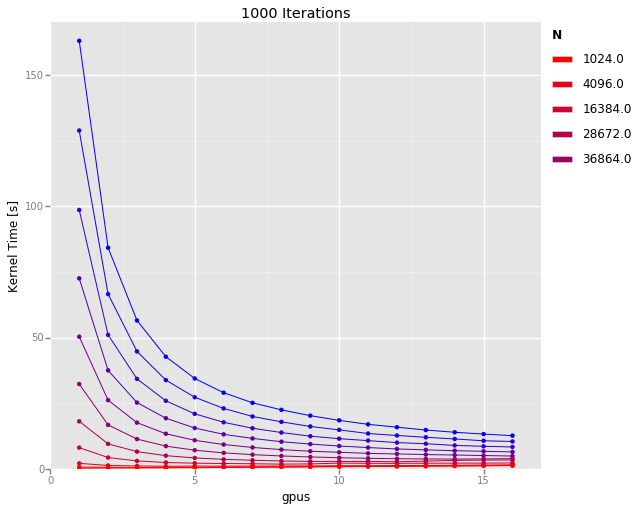

<ggplot: (8767967420197)>

In [8]:
p = ggplot(aes(x="gpus", y="kernel", color="N"), data=df) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("Kernel Time [s]") +\
xlim(0, 17) + ylim(0, 170) + ggtitle("1000 Iterations")
p

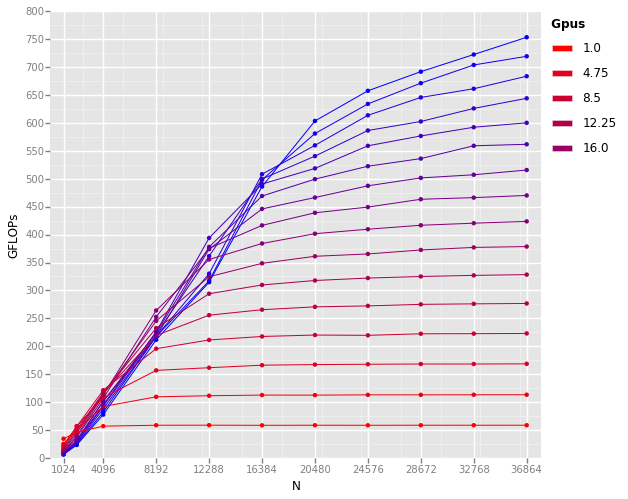

<ggplot: (8767967434321)>

In [9]:
p = ggplot(aes(x="N", y="GFLOPs", color="gpus"), data=df) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("GFLOPs") +\
scale_x_continuous(breaks=[1024,4096,8192,12288,16384,20480,24576,28672,32768,36864]) +\
xlim(0, 38000) + ylim(0, 800)
p

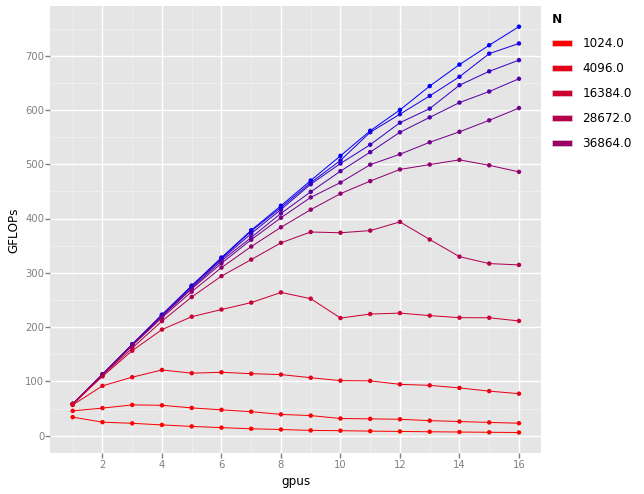

<ggplot: (8767967426409)>

In [10]:
p = ggplot(aes(x="gpus", y="GFLOPs", color="N"), data=df) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("GFLOPs")
#xlim(0, 38000) + ylim(0, 800)
p

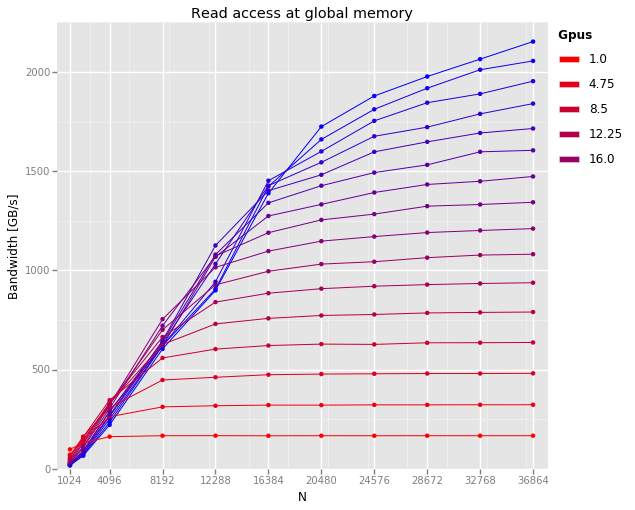

<ggplot: (8767967555549)>

In [11]:
p = ggplot(aes(x="N", y="bandwidth", color="gpus"), data=df) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("Bandwidth [GB/s]") +\
scale_x_continuous(breaks=[1024,4096,8192,12288,16384,20480,24576,28672,32768,36864]) +\
xlim(0, 38000) + ylim(0, 2250) + ggtitle("Read access at global memory")
p

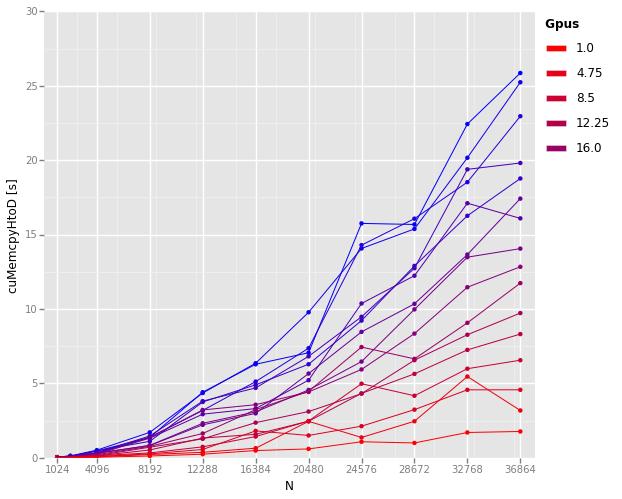

<ggplot: (8767967510477)>

In [12]:
p = ggplot(aes(x="N", y="htod", color="gpus"), data=df) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("cuMemcpyHtoD [s]") +\
scale_x_continuous(breaks=[1024,4096,8192,12288,16384,20480,24576,28672,32768,36864]) +\
xlim(0, 38000) + ylim(0, 30)
p

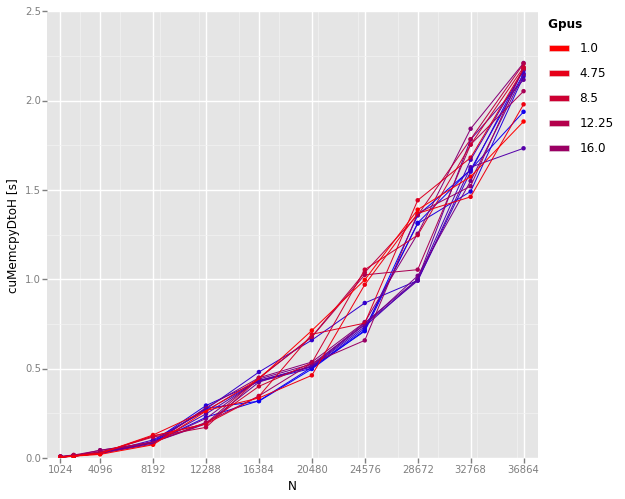

<ggplot: (8767967032989)>

In [13]:
p = ggplot(aes(x="N", y="dtoh", color="gpus"), data=df) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("cuMemcpyDtoH [s]") +\
scale_x_continuous(breaks=[1024,4096,8192,12288,16384,20480,24576,28672,32768,36864]) +\
xlim(0, 38000) + ylim(0, 2.50)
p

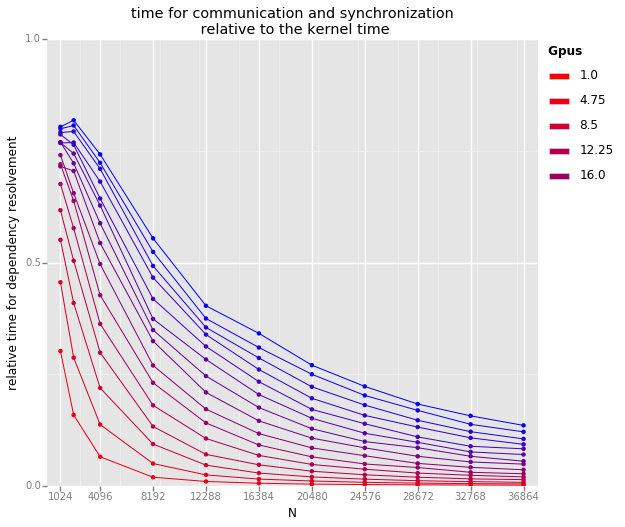

<ggplot: (8767966361909)>

In [14]:
p = ggplot(aes(x="N", y="relDepResTime", color="gpus"), data=df) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("relative time for dependency resolvement") +\
scale_x_continuous(breaks=[1024,4096,8192,12288,16384,20480,24576,28672,32768,36864]) +\
xlim(0, 38000) + ylim(0,1.0) + ggtitle("time for communication and synchronization\n relative to the kernel time")
p

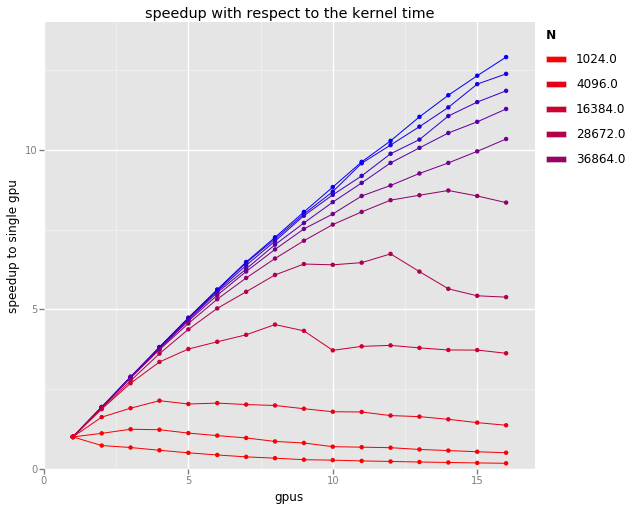

<ggplot: (8767966362057)>

In [15]:
p = ggplot(aes(x="gpus", y="speedup", color="N"), data=df) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("speedup to single gpu") +\
xlim(0, 17) + ylim(0,14) + ggtitle("speedup with respect to the kernel time")
p

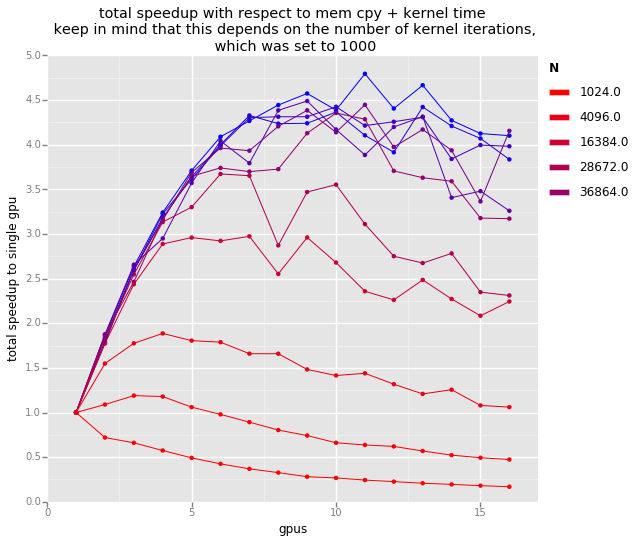

<ggplot: (8767966412037)>

In [16]:
p = ggplot(aes(x="gpus", y="totalSpeedup", color="N"), data=df) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("total speedup to single gpu") +\
xlim(0, 17) + ylim(0,5) + ggtitle("total speedup with respect to mem cpy + kernel time\n keep in mind that this depends on the number of kernel iterations,\n which was set to 1000")
p

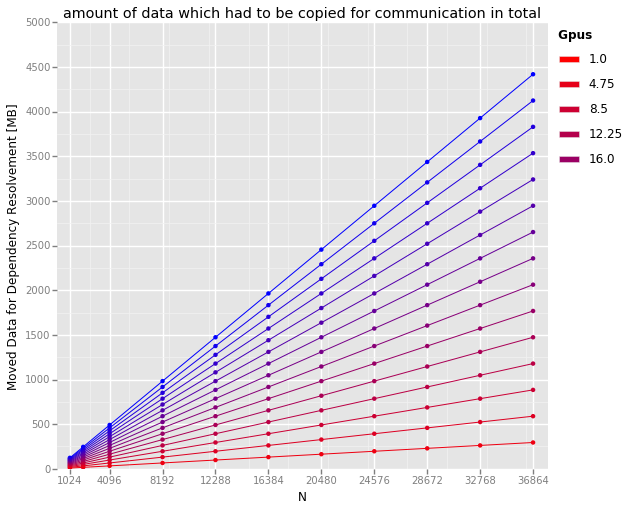

<ggplot: (8767966338557)>

In [17]:
p = ggplot(aes(x="N", y="depResSize[MB]", color="gpus"), data=df) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("Moved Data for Dependency Resolvement [MB]") +\
scale_x_continuous(breaks=[1024,4096,8192,12288,16384,20480,24576,28672,32768,36864]) +\
xlim(0, 38000) + ylim(0,5000) + ggtitle("amount of data which had to be copied for communication in total")
p

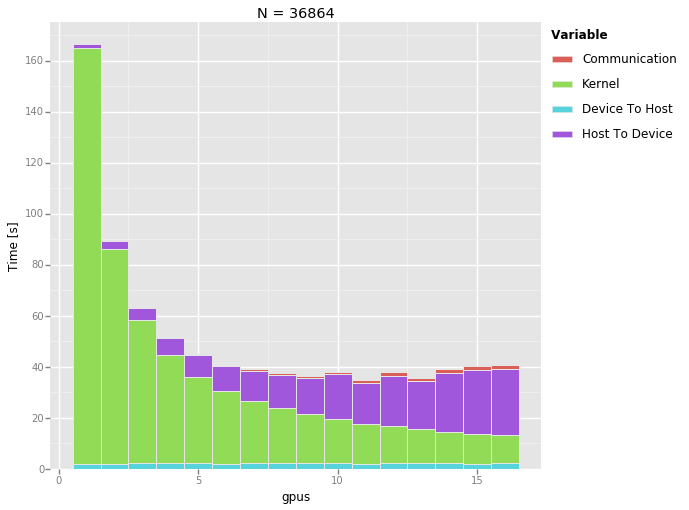

<ggplot: (8767966279029)>

In [18]:
dummy = df[df.N == 36864].loc[:,["gpus","dtoh","htod", "kernel-depResTime","depResTime"]]
dummy.columns = ["gpus", "device to host", "host to device", "Kernel", "Communication"]

df0 = pd.melt(dummy, id_vars=["gpus"])
p = ggplot(df0, aes(x='gpus', y="value", fill="variable")) + geom_bar(stat="identity")
p + ylab("Time [s]") + ggtitle("N = 36864")

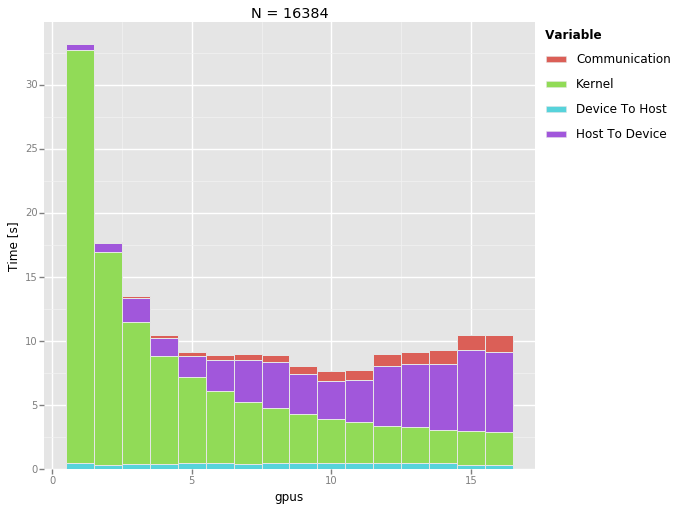

<ggplot: (8767967422493)>

In [19]:
dummy = df[df.N == 16384].loc[:,["gpus","dtoh","htod", "kernel-depResTime","depResTime"]]
dummy.columns = ["gpus", "device to host", "host to device", "Kernel", "Communication"]

df0 = pd.melt(dummy, id_vars=["gpus"])
p = ggplot(df0, aes(x='gpus', y="value", fill="variable")) + geom_bar(stat="identity")
p + ylab("Time [s]") + ggtitle("N = 16384")